In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("Income.csv.zip")
display(df.head())

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:

# Convert 'income' column to numerical values
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)


Text(0, 0.5, 'Income')

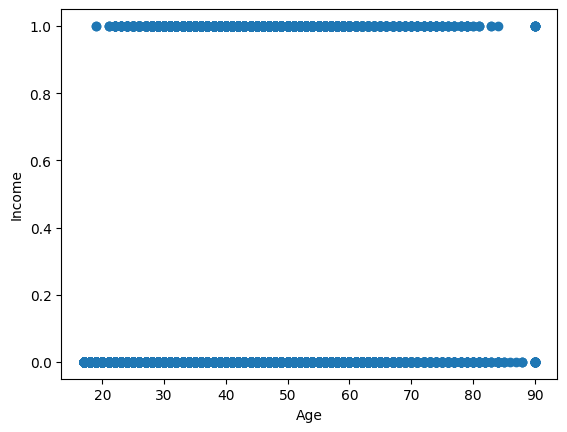

In [4]:
plt.scatter(df.age,df['income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','income']])
y_predicted


array([2, 2, 2, ..., 0, 2, 1], dtype=int32)

In [6]:
df['cluster']=y_predicted
display(df.head())


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,cluster
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0,2
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,2
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0,2
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,2
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,0


In [7]:
km.cluster_centers_

array([[42.34901558,  0.3555784 ],
       [26.13438679,  0.10591501],
       [60.27399829,  0.31645354]])

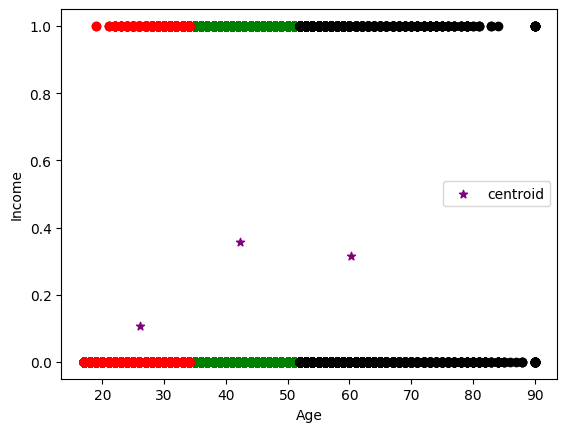

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['income'],color='green')
plt.scatter(df2.age,df2['income'],color='red')
plt.scatter(df3.age,df3['income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()


In [9]:
scaler = MinMaxScaler()
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])
scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])


In [10]:

display(df.head())

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,cluster
0,1.000000,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0.0,2
1,0.890411,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0.0,2
2,0.671233,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0.0,2
3,0.506849,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0.0,2
4,0.328767,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0.0,0


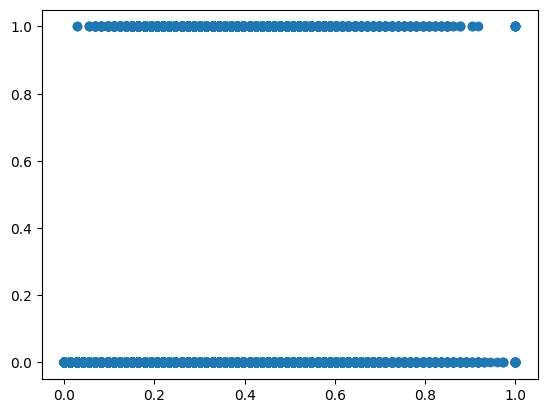

In [11]:
plt.scatter(df.age,df['income'])

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','income']])

In [13]:
y_predicted

array([2, 2, 2, ..., 1, 2, 0], dtype=int32)

In [14]:
df['cluster']=y_predicted
display(df.head())

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,cluster
0,1.000000,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0.0,2
1,0.890411,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0.0,2
2,0.671233,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0.0,2
3,0.506849,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0.0,2
4,0.328767,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0.0,2


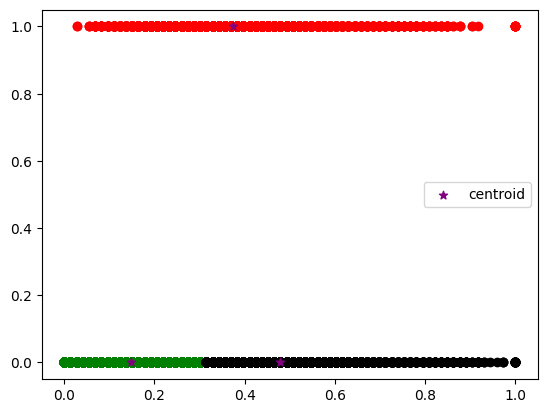

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['income'],color='green')
plt.scatter(df2.age,df2['income'],color='red')
plt.scatter(df3.age,df3['income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Text(0, 0.5, 'Sum of squared error')

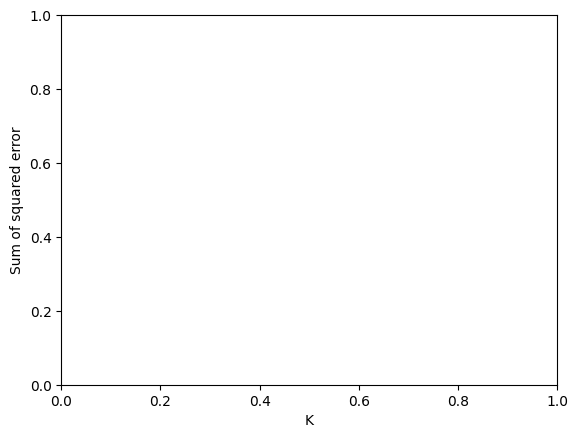

In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','income']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')